#SAI SRIKANTH SARABU
#CWID: A20343781

In [1]:
!pip install pyspark

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from pyspark import SparkContext, SparkConf
import numpy as np                           #importing numpy for simple calculation
import matplotlib.pyplot as plt              #importing matplotlib for line plot

In [4]:
data= '/content/drive/MyDrive/Sample Data/data.txt'

In [5]:
sc = SparkContext("local","Project-3: k-Means Clustering with PySpark") 

In [6]:
allData = sc.textFile(data) #Making complete RDD

In [7]:
#this function converts each number in a line to to float and return List 
def convertToFloat(x):
  floatX = []
  for i in x:
    floatX.append(float(i))
  return floatX 
#the below line splitting the complete data to each line, converting strings to float numbers, assigning index to each line in the data
allDataPoints = allData.map(lambda line: line.split()).map(lambda x:convertToFloat(x)).zipWithIndex().map(lambda x:(x[1],x[0]))

In [8]:
K = 10      #initializing K as number of clusters
I = 20      #initializing I for number of iterations
#below line is taking random K points from the complete data as initial centroids
centroidsDataRDD = sc.broadcast(sc.parallelize(allDataPoints.takeSample(False,K)).collect())

**K- Means using Euclidean distance**

In [9]:
#Function below will find nearest centroid to point and return the centroid index i.e., the line it is present in the file, its value(all dimenions) and cost of that data point 
def euclDist(x):
  minDist = float('inf')                              #initializing distance to the inifinity
  for i in centroidsDataED.value:                     #looping through all the centroids
    dist = np.sqrt(np.sum(np.square(np.array(x[1]) - np.array(i[1]))))    #subtracting data point value with centroid value, squaring it, adding all those and square rooting it. 
    if dist < minDist:                                #making sure we get minimum distance centroid
      minDist = dist                                  #assigning minimum distance
      clusterNumber = i[0]                            #assigning the cluster number of that minimum distance centroid
  return (clusterNumber,x[1],round(minDist**2,2))     #returning centrioid cluster number, values and cost of the point

In [10]:
costFuncED = []                                       #initializing cost list for I(20) iterations
centroidsDataED = centroidsDataRDD                    #copying initial centroid value 
for i in range(I):                                    #iterating I(20) times
  clusters = allDataPoints.map(lambda x: euclDist(x))       #calling euclDistance() function to get cluster each point it belongs to.
  #below line taking centroid cluster number and value then grouping by the key and making list of all value lists and taking average of that to new centroid
  #and then broadcasting centroids to access in euclDist in next iteration. 
  centroidsDataED = sc.broadcast(clusters.map(lambda x:(x[0],x[1])).groupByKey().mapValues(list).map(lambda x: (x[0],np.average(x[1],axis =0))).collect())
  costFuncED.append(clusters.map(lambda x:x[2]).sum())      #Summing up cost of each point and appending it to the List.

In [11]:
print("\033[1mCost function (Φ) for kmeans using Euclidean distance in 20 iterations\033[0m\n")
for i in range(len(costFuncED)):                #printing cost value for all iterations
  print('Iteration no.'+str(i+1)+':    '+str(costFuncED[i]))

Cost function (Φ) for kmeans using Euclidean distance in 20 iterations

Iteration no.1:    1031297237.0599988
Iteration no.2:    837084901.8799949
Iteration no.3:    700223584.2699974
Iteration no.4:    572177735.6600052
Iteration no.5:    533121528.3100014
Iteration no.6:    515608164.9900013
Iteration no.7:    500726624.650002
Iteration no.8:    489019622.29000056
Iteration no.9:    481747843.86999893
Iteration no.10:    476792430.63000125
Iteration no.11:    472883517.72000045
Iteration no.12:    469417482.07000077
Iteration no.13:    467477384.21000105
Iteration no.14:    466181181.0700026
Iteration no.15:    464992825.94999784
Iteration no.16:    464202262.4399996
Iteration no.17:    463576253.8699982
Iteration no.18:    463000778.0800011
Iteration no.19:    462366473.40000093
Iteration no.20:    461886629.75999975


In [12]:
#below lines is copying centroids value after I(20) iterations to a file 
file1 = open("K-Centroids.txt", "w")
file1.write('Centroids of 10 clusters after 20 iterations for Euclidean Distance\n\n')
print('\033[1mCentroids of 10 clusters after 20 iterations for Euclidean Distance \033[0m\n')
for i in range(len(centroidsDataED.value)):
  file1.write('Centroid '+str(i+1)+' ->'+str(list(np.around(centroidsDataED.value[i][1],decimals=2)))+'\n')
  print('Centroid '+str(i+1)+' ->'+str(list(np.around(centroidsDataED.value[i][1],decimals=2))))

Centroids of 10 clusters after 20 iterations for Euclidean Distance 

Centroid 1 ->[0.11, 0.14, 0.34, 0.28, 0.39, 0.12, 0.22, 0.15, 0.15, 0.27, 0.11, 0.55, 0.1, 0.03, 0.04, 0.3, 0.29, 0.23, 1.75, 0.17, 0.99, 0.49, 0.16, 0.11, 0.47, 0.16, 0.08, 0.05, 0.04, 0.04, 0.04, 0.01, 0.04, 0.01, 0.05, 0.06, 0.15, 0.02, 0.03, 0.08, 0.02, 0.04, 0.03, 0.02, 0.11, 0.15, 0.01, 0.02, 0.14, 0.14, 0.02, 0.28, 0.12, 0.09, 7.23, 71.63, 364.41, 0.59]
Centroid 2 ->[0.14, 0.16, 0.36, 0.22, 0.29, 0.14, 0.08, 0.15, 0.4, 0.49, 0.11, 0.55, 0.13, 0.09, 0.16, 0.26, 0.13, 0.38, 1.48, 0.23, 0.99, 0.8, 0.17, 0.18, 0.4, 0.14, 0.03, 0.02, 0.01, 0.02, 0.02, 0.0, 0.09, 0.0, 0.11, 0.03, 0.13, 0.0, 0.02, 0.03, 0.01, 0.03, 0.01, 0.01, 0.04, 0.04, 0.01, 0.03, 0.05, 0.12, 0.04, 0.32, 0.16, 0.1, 6.9, 130.5, 1074.3, 0.68]
Centroid 3 ->[0.2, 0.17, 0.54, 0.0, 0.48, 0.28, 0.15, 0.17, 0.42, 0.43, 0.18, 0.57, 0.21, 0.25, 0.47, 0.31, 0.2, 0.42, 1.72, 0.43, 0.9, 0.23, 0.42, 0.23, 0.18, 0.05, 0.01, 0.0, 0.0, 0.01, 0.0, 0.0, 0.06, 0.0, 0

**K- Means using Manhattan distance**

In [13]:
#Function below will find nearest centroid to point and return the centroid index i.e., the line it is present in the file, its value(all dimenions) and cost of that data point 
def manDist(x):
  minDist = float('inf')                                      #initializing distance to the inifinity
  for i in centroidsDataMD.value:                             #looping through all the centroids
    dist = np.sum(np.abs(np.array(x[1]) - np.array(i[1])))    #subtracting data point value with centroid value, taking absolute value, adding all values.
    if dist < minDist:                                        #making sure we get minimum distance centroid
      minDist = dist                                          #assigning minimum distance
      clusterNumber = i[0]                                    #assigning the cluster number of that minimum distance centroid
  return (clusterNumber,x[1],round(minDist,2))                #returning centrioid cluster number, values and cost of the point

In [14]:
costFuncMD = []                                                 #initializing cost list for I(20) iterations
centroidsDataMD = centroidsDataRDD                              #copying initial centroid value
for i in range(I):                                              #iterating I(20) times
  clusters = allDataPoints.map(lambda x: manDist(x))            #calling euclDistance() function to get cluster each point it belongs to.
  #below line taking centroid cluster number and value then grouping by the key and making list of all value lists and taking average of that to new centroid
  #and then broadcasting centroids to access in euclDist in next iteration. 
  centroidsDataMD = sc.broadcast(clusters.map(lambda x:(x[0],x[1])).groupByKey().mapValues(list).map(lambda x: (x[0],np.average(x[1],axis =0))).collect())
  costFuncMD.append(clusters.map(lambda x:x[2]).sum())          #Summing up cost of each point and appending it to the List.

In [15]:
print("\033[1mCost function (Ψ) for kmeans using Manhattan distance in 20 iterations\033[0m\n")
for i in range(len(costFuncMD)):                            #printing cost value for all iterations
  print('Iteration no.'+str(i+1)+':    '+str(costFuncMD[i]))

Cost function (Ψ) for kmeans using Manhattan distance in 20 iterations

Iteration no.1:    668216.239999998
Iteration no.2:    602249.1699999982
Iteration no.3:    588421.2899999956
Iteration no.4:    560652.3000000007
Iteration no.5:    537183.2799999998
Iteration no.6:    505974.639999999
Iteration no.7:    500342.62000000064
Iteration no.8:    504576.24000000034
Iteration no.9:    501448.2199999983
Iteration no.10:    502537.4499999967
Iteration no.11:    494289.5999999968
Iteration no.12:    494973.71999999933
Iteration no.13:    492448.33999999997
Iteration no.14:    486815.32000000234
Iteration no.15:    481487.9999999959
Iteration no.16:    473876.62000000227
Iteration no.17:    471387.86000000057
Iteration no.18:    467020.6300000012
Iteration no.19:    447292.30000000156
Iteration no.20:    438184.30999999895


In [16]:
#below lines is copying centroids value after I(20) iterations to a file
file1.write('\n\nCentroids of 10 clusters after 20 iterations for Manhattan Distance \n\n')
print('\033[1mCentroids of 10 clusters after 20 iterations for Manhattan distance \033[0m \n')
for i in range(len(centroidsDataMD.value)):
  file1.write('Centroid '+str(i+1)+' ->'+str(list(np.around(centroidsDataMD.value[i][1],decimals=2)))+'\n')
  print('Centroid '+str(i+1)+' ->'+str(list(np.around(centroidsDataMD.value[i][1],decimals=2))))
file1.close()

Centroids of 10 clusters after 20 iterations for Manhattan distance  

Centroid 1 ->[0.11, 0.12, 0.33, 0.17, 0.39, 0.13, 0.21, 0.15, 0.13, 0.27, 0.1, 0.54, 0.09, 0.03, 0.02, 0.29, 0.31, 0.22, 1.75, 0.19, 1.0, 0.46, 0.17, 0.1, 0.46, 0.16, 0.08, 0.04, 0.03, 0.03, 0.04, 0.02, 0.04, 0.02, 0.05, 0.06, 0.15, 0.01, 0.03, 0.08, 0.02, 0.03, 0.03, 0.02, 0.14, 0.14, 0.01, 0.03, 0.14, 0.14, 0.02, 0.29, 0.13, 0.09, 6.9, 70.52, 338.72, 0.6]
Centroid 2 ->[0.14, 0.15, 0.34, 0.34, 0.29, 0.13, 0.07, 0.17, 0.37, 0.46, 0.1, 0.52, 0.14, 0.09, 0.14, 0.28, 0.14, 0.35, 1.48, 0.22, 0.92, 0.81, 0.19, 0.19, 0.38, 0.14, 0.02, 0.02, 0.01, 0.02, 0.02, 0.0, 0.1, 0.0, 0.1, 0.04, 0.14, 0.0, 0.02, 0.03, 0.01, 0.02, 0.01, 0.01, 0.04, 0.05, 0.01, 0.03, 0.05, 0.12, 0.04, 0.29, 0.16, 0.1, 5.85, 114.28, 1151.35, 0.66]
Centroid 3 ->[0.3, 0.2, 0.3, 0.05, 0.16, 0.09, 0.03, 0.15, 0.29, 0.44, 0.17, 0.61, 0.34, 0.64, 0.05, 0.22, 0.29, 0.12, 2.05, 0.05, 0.94, 0.05, 0.4, 0.31, 0.24, 0.07, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.21, 0.0, 0

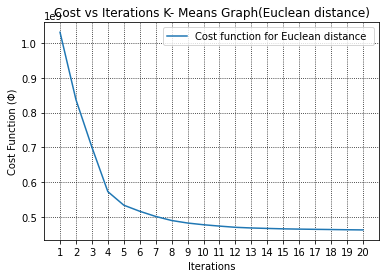

In [17]:
#graph for cost function vs Iterations for Euclean distance
x = [i+1 for i in range(I)]
plt.plot(x, costFuncED, label="Cost function for Euclean distance ");
plt.grid(True,color='k',linestyle=':')

plt.title("Cost vs Iterations K- Means Graph(Euclean distance)");
plt.xlabel("Iterations");
plt.xlim(0,I+1)
plt.xticks(x) 
plt.ylabel("Cost Function (Φ)");
plt.legend(loc=0);


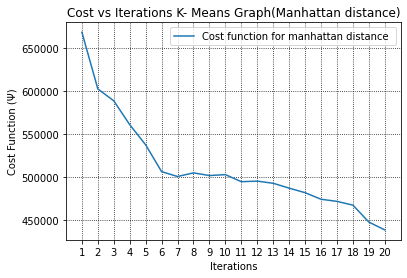

In [18]:
#graph for cost function vs Iterations for Manhattan distance
plt.plot(x, costFuncMD, label="Cost function for manhattan distance ");
plt.grid(True,color='k',linestyle=':')
plt.title("Cost vs Iterations K- Means Graph(Manhattan distance)");
plt.xlabel("Iterations");
plt.xlim(0,I+1)
plt.xticks(x) 
plt.ylabel("Cost Function (Ψ)");
plt.legend(loc=0);

In [19]:
#percentage change in cost function after 10 iterations for Euclidean distance
perChED = ((costFuncED[0] - costFuncED[9])*100)/costFuncED[0]

print('Percentage change in Cost Function(Φ) after 10 iterations for Euclidean Distance is '+'\033[1m'+str(round(perChED,2))+'\033[0m')

Percentage change in Cost Function(Φ) after 10 iterations for Euclidean Distance is 53.77


In [20]:
#percentage change in cost function after 10 iterations for Manhattan distance
perChMD = ((costFuncMD[0] - costFuncMD[9])*100)/costFuncMD[0]
print('Percentage change in Cost Function(Φ) after 10 iterations for Manhattan distance is '+'\033[1m'+str(round(perChMD,2))+'\033[0m')

Percentage change in Cost Function(Φ) after 10 iterations for Manhattan distance is 24.79


**Cost function comparision for Euclidean distance and Manhattan distance**

The Cost function for Euclidean distance decreases gradually in each and every iteration after updating the centroid through out 20 iteration, where as cost function for Manhattan distance also decreases but with some slight adjustments in between 20 iterations, after 10 iteration the decrease in cost function for Euclidean distance more than decrease in Manhattan distance. Therefore we can say that Euclidean distance works with better performance than Manhattan distance for the given data.